Stress Detection Using Lifestyle Data

This project predicts stress levels (Low, Medium, High) based on sleep duration, work hours, exercise frequency, and screen time. Various classification models are compared and key insights are visualized.

5 SDGs related to project:

1. SDG 3: Good Health and Well-being  
   This project helps identify stress, promoting mental health and well-being by enabling early intervention and healthier lifestyle choices.

2. SDG 8: Decent Work and Economic Growth  
   By analyzing work hours and stress, the project supports healthier work environments, improving productivity and employee satisfaction.

3. SDG 4: Quality Education
   Stress detection can be applied in educational settings to monitor student well-being, supporting better learning outcomes and mental health.

4. SDG 11: Sustainable Cities and Communities 
   Understanding stress patterns in urban populations helps design smarter, healthier cities with improved public health strategies.

5. SDG 9: Industry, Innovation and Infrastructure
   Use of data-driven technology for health monitoring encourages innovation in digital health infrastructure and smart city solutions.

In [8]:
# Import Required Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, recall_score, f1_score

Data Cleaning

In [9]:
# Load and Preview Data
df = pd.read_csv('stress_dataset.csv')
print("Column names in the dataset:", list(df.columns))

# Clean column names by stripping whitespace
df.columns = df.columns.str.strip()
print("\nColumn names after cleaning:", list(df.columns))

# Encode categorical variables
df['Age_Code'] = pd.Categorical(df['Age']).codes
df['Gender_Code'] = pd.Categorical(df['Gender']).codes
df['Work_Hours_Code'] = pd.Categorical(df['Work hours']).codes
df['Screen_Time_Code'] = pd.Categorical(df['Screen time']).codes
df['Sleep_Time_Code'] = pd.Categorical(df['Sleep time']).codes
df['Exercise_Freq_Code'] = pd.Categorical(df['Exercise frequency']).codes
df['Mood_Code'] = pd.Categorical(df['Mood Stability']).codes
df['Fatigue_Code'] = pd.Categorical(df['Fatigue level']).codes
df['Headache_Code'] = pd.Categorical(df['Headache']).codes
df['Work_Life_Balance_Code'] = pd.Categorical(df['Work_life Balance']).codes
df['Social_Support_Code'] = pd.Categorical(df['Social Support']).codes

# Create stress level based on multiple factors
df['Stress_Level'] = pd.cut(
    df['Fatigue_Code'] + df['Mood_Code'] + df['Headache_Code'] - df['Work_Life_Balance_Code'] - df['Social_Support_Code'],
    bins=3,
    labels=['Low', 'Medium', 'High']
)

df.head()

Column names in the dataset: ['Age', 'Gender', 'Work hours', 'Screen time', 'Sleep time', 'Exercise frequency', 'Mood Stability', 'Fatigue level', 'Headache ', 'Work_life Balance', 'Social Support']

Column names after cleaning: ['Age', 'Gender', 'Work hours', 'Screen time', 'Sleep time', 'Exercise frequency', 'Mood Stability', 'Fatigue level', 'Headache', 'Work_life Balance', 'Social Support']


,Age,Gender,Work hours,Screen time,Sleep time,Exercise frequency,Mood Stability,Fatigue level,Headache,Work_life Balance,...,Work_Hours_Code,Screen_Time_Code,Sleep_Time_Code,Exercise_Freq_Code,Mood_Code,Fatigue_Code,Headache_Code,Work_Life_Balance_Code,Social_Support_Code,Stress_Level
0,16 - 21,Male,Less than 7 hours,More than 6 hours,4 - 6 hours,Never,Unstable,Exhausted,Rarely,Somewhat Balanced,...,2,3,0,3,2,0,2,2,0,Medium
1,16 - 21,Male,More than 10 hours,More than 6 hours,Less than 4 hours,Never,Unstable,Often tired,Never,Not Balanced,...,3,3,2,3,2,3,1,1,1,Medium
2,22 - 30,Female,9 - 10 hours,4 - 6 hours,Less than 4 hours,Daily,Unstable,Occasionally tired,Never,Not Balanced,...,1,1,2,2,2,2,1,1,0,Medium
3,30 - 45,Female,More than 10 hours,Less than 2 hours,Less than 4 hours,1 - 2 times per week,Stable,Occasionally tired,Never,Somewhat Balanced,...,3,2,2,0,1,2,1,2,1,Medium
4,22 - 30,Female,More than 10 hours,4 - 6 hours,Less than 4 hours,Never,Neutral,Often tired,Rarely,Somewhat Balanced,...,3,1,2,3,0,3,2,2,1,Medium


In [10]:
# Check for missing values
df.isnull().sum()

Age                         0
Gender                      0
Work hours                  0
Screen time                 0
Sleep time                  0
Exercise frequency          0
Mood Stability              0
Fatigue level               0
Headache                    0
Work_life Balance           0
Social Support            272
Age_Code                    0
Gender_Code                 0
Work_Hours_Code             0
Screen_Time_Code            0
Sleep_Time_Code             0
Exercise_Freq_Code          0
Mood_Code                   0
Fatigue_Code                0
Headache_Code               0
Work_Life_Balance_Code      0
Social_Support_Code         0
Stress_Level                0
dtype: int64

In [11]:
# All our columns are already properly encoded, no missing values to handle

In [12]:
# Drop rows where Stress_Level is missing (if any)
df = df.dropna(subset=['Stress_Level'])

In [13]:
# Remove duplicate rows if present
df = df.drop_duplicates()

In [14]:
# Ensure all features are numeric and Stress_Level is categorical
numeric_columns = ['Age_Code', 'Gender_Code', 'Work_Hours_Code', 'Screen_Time_Code', 
                  'Sleep_Time_Code', 'Exercise_Freq_Code', 'Mood_Code', 'Fatigue_Code',
                  'Headache_Code', 'Work_Life_Balance_Code', 'Social_Support_Code']
df[numeric_columns] = df[numeric_columns].apply(pd.to_numeric)
df['Stress_Level'] = df['Stress_Level'].astype('category')

print("Data types after conversion:")
df[numeric_columns + ['Stress_Level']].dtypes

Data types after conversion:


Age_Code                      int8
Gender_Code                   int8
Work_Hours_Code               int8
Screen_Time_Code              int8
Sleep_Time_Code               int8
Exercise_Freq_Code            int8
Mood_Code                     int8
Fatigue_Code                  int8
Headache_Code                 int8
Work_Life_Balance_Code        int8
Social_Support_Code           int8
Stress_Level              category
dtype: object

In [15]:
# Encode Stress_Level to numeric labels
if 'Stress_Level_Code' not in df.columns:
    df['Stress_Level_Code'] = df['Stress_Level'].map({'Low': 0, 'Medium': 1, 'High': 2})
df.head()

,Age,Gender,Work hours,Screen time,Sleep time,Exercise frequency,Mood Stability,Fatigue level,Headache,Work_life Balance,...,Screen_Time_Code,Sleep_Time_Code,Exercise_Freq_Code,Mood_Code,Fatigue_Code,Headache_Code,Work_Life_Balance_Code,Social_Support_Code,Stress_Level,Stress_Level_Code
0,16 - 21,Male,Less than 7 hours,More than 6 hours,4 - 6 hours,Never,Unstable,Exhausted,Rarely,Somewhat Balanced,...,3,0,3,2,0,2,2,0,Medium,1
1,16 - 21,Male,More than 10 hours,More than 6 hours,Less than 4 hours,Never,Unstable,Often tired,Never,Not Balanced,...,3,2,3,2,3,1,1,1,Medium,1
2,22 - 30,Female,9 - 10 hours,4 - 6 hours,Less than 4 hours,Daily,Unstable,Occasionally tired,Never,Not Balanced,...,1,2,2,2,2,1,1,0,Medium,1
3,30 - 45,Female,More than 10 hours,Less than 2 hours,Less than 4 hours,1 - 2 times per week,Stable,Occasionally tired,Never,Somewhat Balanced,...,2,2,0,1,2,1,2,1,Medium,1
4,22 - 30,Female,More than 10 hours,4 - 6 hours,Less than 4 hours,Never,Neutral,Often tired,Rarely,Somewhat Balanced,...,1,2,3,0,3,2,2,1,Medium,1


Model Building and Evaluation

Train and evaluate Random Forest, Logistic Regression, and SVM models.

In [16]:
# Feature Selection and Data Split
features = ['Age_Code', 'Gender_Code', 'Work_Hours_Code', 'Screen_Time_Code', 
           'Sleep_Time_Code', 'Exercise_Freq_Code', 'Mood_Code', 'Fatigue_Code',
           'Headache_Code', 'Work_Life_Balance_Code', 'Social_Support_Code']

X = df[features]
y = df['Stress_Level_Code']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [17]:
# Random Forest Classifier
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
print('Random Forest Accuracy:', accuracy_score(y_test, y_pred))
print('Classification Report:\n', classification_report(y_test, y_pred))
print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred))

Random Forest Accuracy: 0.8968609865470852
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.73      0.84        49
           1       0.86      0.99      0.92       134
           2       0.97      0.80      0.88        40

    accuracy                           0.90       223
   macro avg       0.94      0.84      0.88       223
weighted avg       0.91      0.90      0.89       223

Confusion Matrix:
 [[ 36  13   0]
 [  1 132   1]
 [  0   8  32]]


In [18]:
# Logistic Regression
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
print('Logistic Regression Accuracy:', accuracy_score(y_test, y_pred_lr))
print('Classification Report:\n', classification_report(y_test, y_pred_lr))

Logistic Regression Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        49
           1       1.00      1.00      1.00       134
           2       1.00      1.00      1.00        40

    accuracy                           1.00       223
   macro avg       1.00      1.00      1.00       223
weighted avg       1.00      1.00      1.00       223



In [19]:
# Support Vector Machine (SVM)
svm = SVC()
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)
print('SVM Accuracy:', accuracy_score(y_test, y_pred_svm))
print('Classification Report:\n', classification_report(y_test, y_pred_svm))

SVM Accuracy: 0.9551569506726457
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.90      0.94        49
           1       0.94      0.99      0.96       134
           2       1.00      0.90      0.95        40

    accuracy                           0.96       223
   macro avg       0.97      0.93      0.95       223
weighted avg       0.96      0.96      0.95       223



Model Comparison

In [20]:
results = []

# Random Forest
results.append({
    'Model': 'Random Forest',
    'Accuracy': accuracy_score(y_test, y_pred),
    'Precision': precision_score(y_test, y_pred, average='weighted'),
    'Recall': recall_score(y_test, y_pred, average='weighted'),
    'F1 Score': f1_score(y_test, y_pred, average='weighted')
})

# Logistic Regression
results.append({
    'Model': 'Logistic Regression',
    'Accuracy': accuracy_score(y_test, y_pred_lr),
    'Precision': precision_score(y_test, y_pred_lr, average='weighted'),
    'Recall': recall_score(y_test, y_pred_lr, average='weighted'),
    'F1 Score': f1_score(y_test, y_pred_lr, average='weighted')
})

# SVM
results.append({
    'Model': 'SVM',
    'Accuracy': accuracy_score(y_test, y_pred_svm),
    'Precision': precision_score(y_test, y_pred_svm, average='weighted'),
    'Recall': recall_score(y_test, y_pred_svm, average='weighted'),
    'F1 Score': f1_score(y_test, y_pred_svm, average='weighted')
})

results_df = pd.DataFrame(results)

results_df

,Model,Accuracy,Precision,Recall,F1 Score
0,Random Forest,0.896861,0.906150,0.896861,0.893960
1,Logistic Regression,1.000000,1.000000,1.000000,1.000000
2,SVM,0.955157,0.957032,0.955157,0.954762


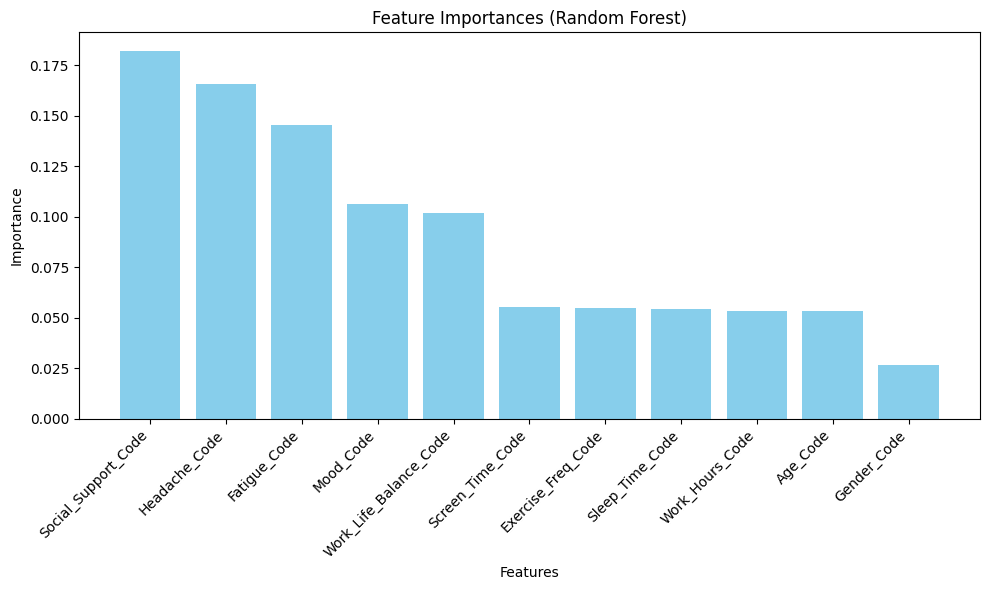


Feature Importances:
Social_Support_Code: 0.1823
Headache_Code: 0.1657
Fatigue_Code: 0.1457
Mood_Code: 0.1064
Work_Life_Balance_Code: 0.1020
Screen_Time_Code: 0.0551
Exercise_Freq_Code: 0.0546
Sleep_Time_Code: 0.0545
Work_Hours_Code: 0.0535
Age_Code: 0.0534
Gender_Code: 0.0267


In [21]:
# Feature Importances
# Visualize which features are most important for stress prediction using Random Forest.

feature_importances = pd.DataFrame({
    'Feature': features,
    'Importance': rf.feature_importances_
})

# Sort by importance
feature_importances = feature_importances.sort_values('Importance', ascending=False)

plt.figure(figsize=(10, 6))
plt.bar(feature_importances['Feature'], feature_importances['Importance'], color='skyblue')
plt.title('Feature Importances (Random Forest)')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Print feature importances
print("\nFeature Importances:")
for idx, row in feature_importances.iterrows():
    print(f"{row['Feature']}: {row['Importance']:.4f}")

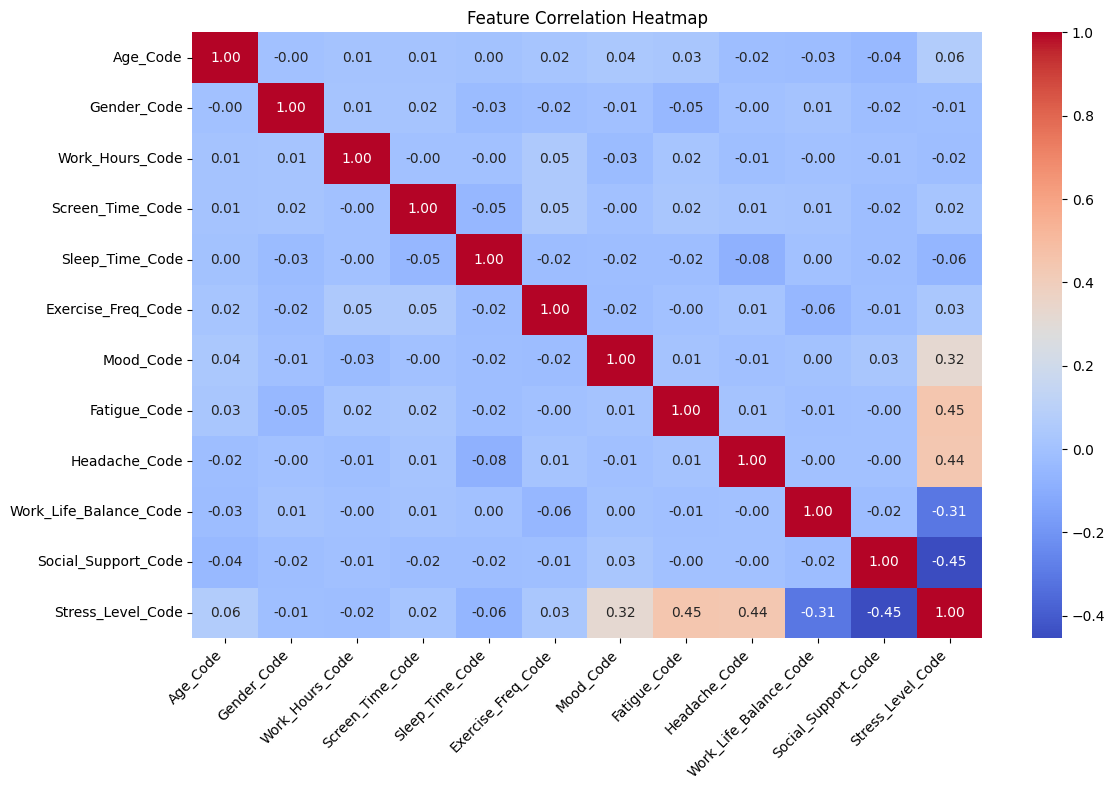


Strongest correlations with Stress Level:
Stress_Level_Code         1.000000
Fatigue_Code              0.446336
Headache_Code             0.440624
Mood_Code                 0.321178
Age_Code                  0.063987
Exercise_Freq_Code        0.031045
Screen_Time_Code          0.022588
Gender_Code              -0.014116
Work_Hours_Code          -0.016863
Sleep_Time_Code          -0.056661
Work_Life_Balance_Code   -0.311259
Social_Support_Code      -0.453570
Name: Stress_Level_Code, dtype: float64


In [22]:
# Feature Correlation Heatmap
# Visualize correlations between features and the target variable.

plt.figure(figsize=(12, 8))
correlation_matrix = df[features + ['Stress_Level_Code']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Feature Correlation Heatmap')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

# Print strongest correlations with Stress Level
correlations = correlation_matrix['Stress_Level_Code'].sort_values(ascending=False)
print("\nStrongest correlations with Stress Level:")
print(correlations)

In [23]:
# Export mappings for the API
import json

mappings = {
    'age_map': {'16 - 21': 0, '22 - 30': 1, '30 - 45': 2, '45 - 60': 3},
    'gender_map': {'Male': 0, 'Female': 1},
    'work_hours_map': {'Less than 7 hours': 0, '7 - 8 hours': 1, '9 - 10 hours': 2, 'More than 10 hours': 3},
    'screen_time_map': {'Less than 2 hours': 0, '2 - 4 hours': 1, '4 - 6 hours': 2, 'More than 6 hours': 3},
    'sleep_time_map': {'Less than 4 hours': 0, '4 - 6 hours': 1, '6 - 8 hours': 2, 'More than 8 hours': 3},
    'exercise_freq_map': {'Never': 0, '1 - 2 times per week': 1, '3 - 4 times per week': 2, 'Daily': 3},
    'mood_map': {'Unstable': 0, 'Neutral': 1, 'Stable': 2},
    'fatigue_map': {'Never tired': 0, 'Occasionally tired': 1, 'Often tired': 2, 'Exhausted': 3},
    'headache_map': {'Never': 0, 'Rarely': 1, 'Sometimes (1 - 2 times/ week)': 2, 'Frequently (more than twice in a week)': 3},
    'work_life_balance_map': {'Not Balanced': 0, 'Somewhat Balanced': 1, 'Balanced': 2},
    'social_support_map': {'None': 0, 'Weak': 1, 'Moderate': 2, 'Very Strong': 3},
    'reverse_mappings': {
        'age': {0: '16 - 21', 1: '22 - 30', 2: '30 - 45', 3: '45 - 60'},
        'gender': {0: 'Male', 1: 'Female'},
        'work_hours': {0: 'Less than 7 hours', 1: '7 - 8 hours', 2: '9 - 10 hours', 3: 'More than 10 hours'},
        'screen_time': {0: 'Less than 2 hours', 1: '2 - 4 hours', 2: '4 - 6 hours', 3: 'More than 6 hours'},
        'sleep_time': {0: 'Less than 4 hours', 1: '4 - 6 hours', 2: '6 - 8 hours', 3: 'More than 8 hours'},
        'exercise_freq': {0: 'Never', 1: '1 - 2 times per week', 2: '3 - 4 times per week', 3: 'Daily'},
        'mood': {0: 'Unstable', 1: 'Neutral', 2: 'Stable'},
        'fatigue': {0: 'Never tired', 1: 'Occasionally tired', 2: 'Often tired', 3: 'Exhausted'},
        'headache': {0: 'Never', 1: 'Rarely', 2: 'Sometimes (1 - 2 times/ week)', 3: 'Frequently (more than twice in a week)'},
        'work_life_balance': {0: 'Not Balanced', 1: 'Somewhat Balanced', 2: 'Balanced'},
        'social_support': {0: 'None', 1: 'Weak', 2: 'Moderate', 3: 'Very Strong'}
    }
}

# Save mappings to a JSON file for the API
with open('mappings.json', 'w') as f:
    json.dump(mappings, f, indent=4)

# Create a sample person (using numerical codes as that's what the model expects)
sample = pd.DataFrame({
    'Age_Code': [2],  # 30 - 45
    'Gender_Code': [0],  # Male
    'Work_Hours_Code': [2],  # 9 - 10 hours
    'Screen_Time_Code': [2],  # 4 - 6 hours
    'Sleep_Time_Code': [2],  # 6 - 8 hours
    'Exercise_Freq_Code': [2],  # 3 - 4 times per week
    'Mood_Code': [2],  # Stable
    'Fatigue_Code': [1],  # Occasionally tired
    'Headache_Code': [1],  # Rarely
    'Work_Life_Balance_Code': [2],  # Balanced
    'Social_Support_Code': [3]  # Very Strong
})

# Predict using Random Forest
predicted_code = rf.predict(sample)[0]
stress_map = {0: 'Low', 1: 'Medium', 2: 'High'}
print("\nPredicted Stress Level:", stress_map[predicted_code])

# Print sample person's profile in human-readable format
print("\nSample Person Profile:")
print(f"Age: {mappings['reverse_mappings']['age'][sample['Age_Code'].iloc[0]]}")
print(f"Gender: {mappings['reverse_mappings']['gender'][sample['Gender_Code'].iloc[0]]}")
print(f"Work Hours: {mappings['reverse_mappings']['work_hours'][sample['Work_Hours_Code'].iloc[0]]}")
print(f"Screen Time: {mappings['reverse_mappings']['screen_time'][sample['Screen_Time_Code'].iloc[0]]}")
print(f"Sleep Time: {mappings['reverse_mappings']['sleep_time'][sample['Sleep_Time_Code'].iloc[0]]}")
print(f"Exercise Frequency: {mappings['reverse_mappings']['exercise_freq'][sample['Exercise_Freq_Code'].iloc[0]]}")
print(f"Mood Stability: {mappings['reverse_mappings']['mood'][sample['Mood_Code'].iloc[0]]}")
print(f"Fatigue Level: {mappings['reverse_mappings']['fatigue'][sample['Fatigue_Code'].iloc[0]]}")
print(f"Headache Frequency: {mappings['reverse_mappings']['headache'][sample['Headache_Code'].iloc[0]]}")
print(f"Work-Life Balance: {mappings['reverse_mappings']['work_life_balance'][sample['Work_Life_Balance_Code'].iloc[0]]}")
print(f"Social Support: {mappings['reverse_mappings']['social_support'][sample['Social_Support_Code'].iloc[0]]}")

# Show feature importance for this prediction
feature_importance = pd.DataFrame({
    'Feature': features,
    'Value': sample.iloc[0],
    'Importance': rf.feature_importances_
})
feature_importance['Weighted_Impact'] = feature_importance['Value'] * feature_importance['Importance']
feature_importance = feature_importance.sort_values('Weighted_Impact', ascending=False)

print("\nFeature impacts on prediction:")
print(feature_importance[['Feature', 'Weighted_Impact']])


Predicted Stress Level: Low

Sample Person Profile:
Age: 30 - 45
Gender: Male
Work Hours: 9 - 10 hours
Screen Time: 4 - 6 hours
Sleep Time: 6 - 8 hours
Exercise Frequency: 3 - 4 times per week
Mood Stability: Stable
Fatigue Level: Occasionally tired
Headache Frequency: Rarely
Work-Life Balance: Balanced
Social Support: Very Strong

Feature impacts on prediction:
                                       Feature  Weighted_Impact
Social_Support_Code        Social_Support_Code         0.546889
Mood_Code                            Mood_Code         0.212772
Work_Life_Balance_Code  Work_Life_Balance_Code         0.203990
Headache_Code                    Headache_Code         0.165677
Fatigue_Code                      Fatigue_Code         0.145718
Screen_Time_Code              Screen_Time_Code         0.110128
Exercise_Freq_Code          Exercise_Freq_Code         0.109252
Sleep_Time_Code                Sleep_Time_Code         0.109087
Work_Hours_Code                Work_Hours_Code         0.1

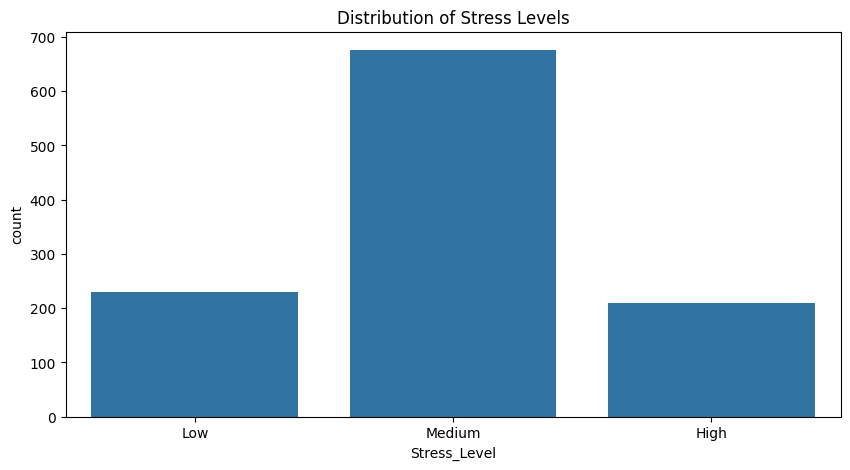

<Figure size 1200x500 with 0 Axes>

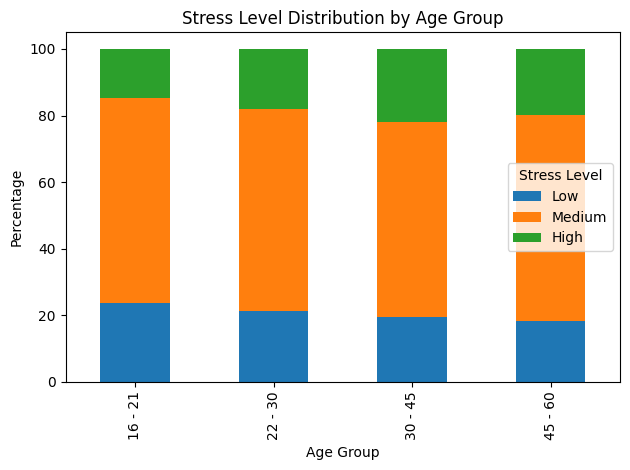

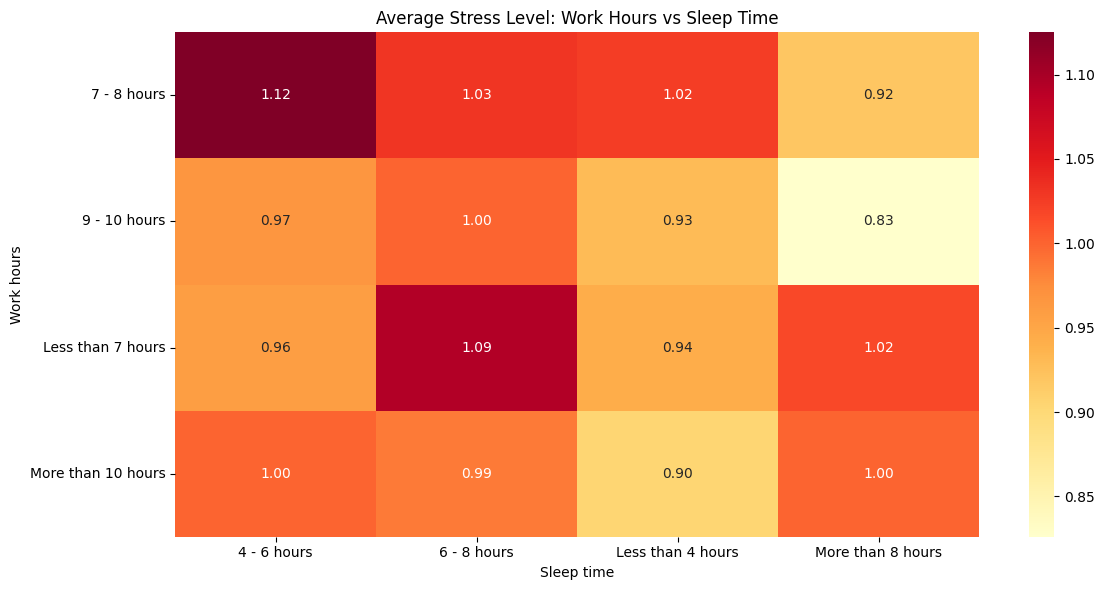

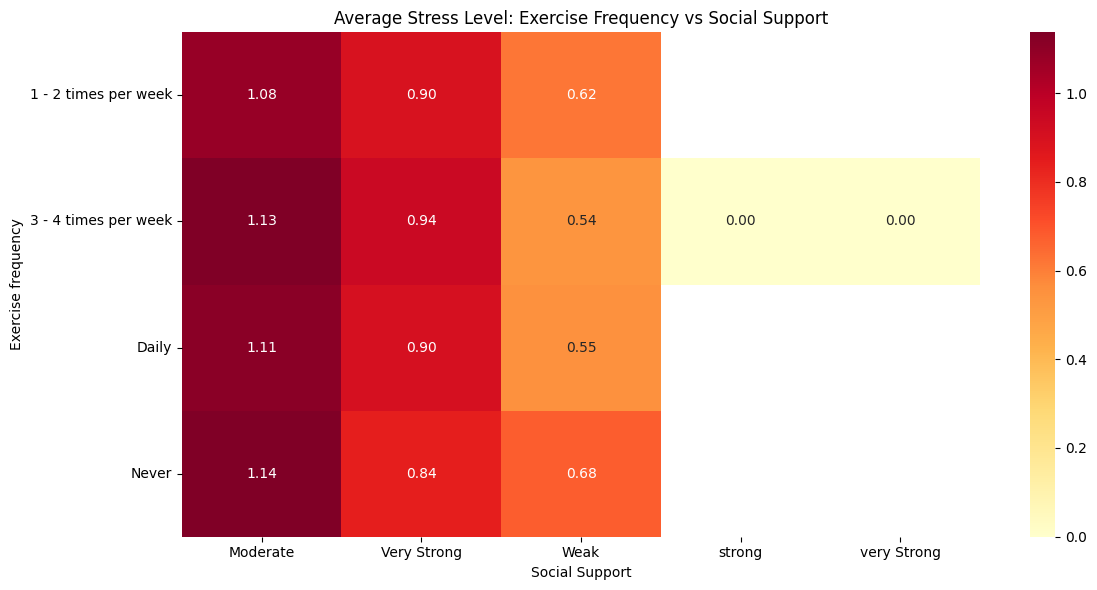

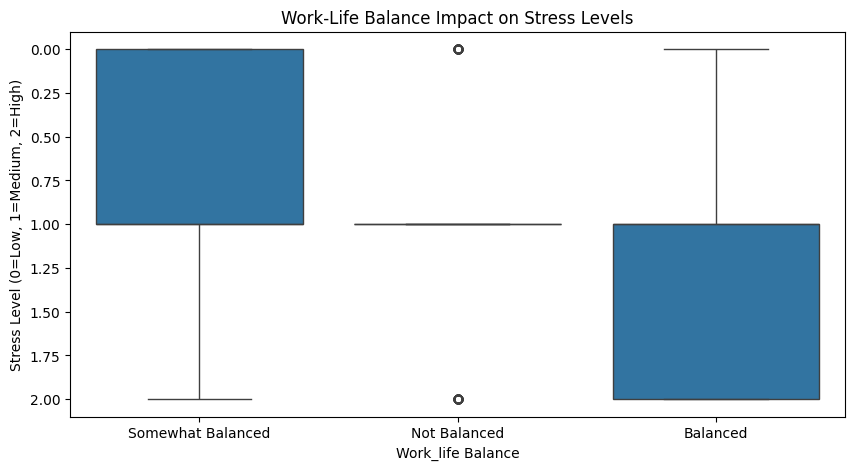

In [25]:
# Additional visualizations for lifestyle factors

# 1. Stress Level Distribution
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='Stress_Level')
plt.title('Distribution of Stress Levels')
plt.show()

# 2. Stress Level by Age Group
plt.figure(figsize=(12, 5))
age_stress = pd.crosstab(df['Age'], df['Stress_Level'], normalize='index') * 100
age_stress.plot(kind='bar', stacked=True)
plt.title('Stress Level Distribution by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Percentage')
plt.legend(title='Stress Level')
plt.tight_layout()
plt.show()

# 3. Work Hours vs Sleep Time Impact
plt.figure(figsize=(12, 6))
stress_avg = pd.crosstab(
    index=df['Work hours'], 
    columns=df['Sleep time'],
    values=df['Stress_Level_Code'].astype('float'),
    aggfunc='mean'
)
sns.heatmap(stress_avg, annot=True, cmap='YlOrRd', fmt='.2f')
plt.title('Average Stress Level: Work Hours vs Sleep Time')
plt.tight_layout()
plt.show()

# 4. Exercise and Social Support Impact
plt.figure(figsize=(12, 6))
exercise_social = pd.crosstab(
    index=df['Exercise frequency'], 
    columns=df['Social Support'],
    values=df['Stress_Level_Code'].astype('float'),
    aggfunc='mean'
)
sns.heatmap(exercise_social, annot=True, cmap='YlOrRd', fmt='.2f')
plt.title('Average Stress Level: Exercise Frequency vs Social Support')
plt.tight_layout()
plt.show()

# 5. Work-Life Balance Impact on Stress
plt.figure(figsize=(10, 5))
sns.boxplot(data=df, x='Work_life Balance', y='Stress_Level_Code')
plt.title('Work-Life Balance Impact on Stress Levels')
plt.ylabel('Stress Level (0=Low, 1=Medium, 2=High)')
plt.show()